In [40]:
#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection

require("data.table")
require("scales")
require("lightgbm")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1881015,100.5,3463728,185.0,3330034,177.9
Vcells,3366675,25.7,1005865578,7674.2,1455372754,11103.7


In [41]:
#Parametros del script
#setwd("C:/_MCD/Labo1/code")  #Establezco el Working Directory
setwd("~/buckets/b1/")

#cargo el dataset
dataset  <- fread("./datasets/c2_reparacNA_fe_inicial_deflacion.csv.gz")   #donde entreno# FIN Parametros del script
nombre_base_pdf <- "densidades"

In [42]:
kexperimento <- "comp2-EDA"
#creo la carpeta donde va el experimento
dir.create( paste0( "./exp/", kexperimento, "/"), showWarnings = FALSE )
setwd(paste0( "./exp/", kexperimento, "/"))   #Establezco el Working Directory DEL EXPERIMENTO


In [43]:
#creo la clase_binaria SI={ BAJA+1, BAJA+2 }    NO={ CONTINUA }
dataset[ foto_mes<=202103, 
         clase01 :=  ifelse( clase_ternaria=="CONTINUA", 0, 1 ) ]

dataset[  , foto_mes := as.character( foto_mes ) ]

In [44]:
#campos_ordenados <- c("ctrx_quarter","mcuentas_saldo","mcaja_ahorro", "mcuenta_corriente","cpayroll_trx","mpayroll","mprestamos_personales","cprestamos_personales","mpasivos_margen","mrentabilidad","mrentabilidad_annual","mcomisiones_mantenimiento","mactivos_margen","cliente_edad","mtarjeta_visa_consumo","ctarjeta_visa_transacciones","Master_Fvencimiento","Master_fechaalta","Visa_Fvencimiento","Visa_fechaalta","ctarjeta_visa_transacciones")
campos_ordenados <- c("ctrx_quarter_normalizado","mcuentas_saldo","mcaja_ahorro", "mcuenta_corriente","cpayroll_trx","mpayroll","mprestamos_personales","cprestamos_personales","mpasivos_margen","mrentabilidad","mrentabilidad_annual","mcomisiones_mantenimiento","mactivos_margen","cliente_edad","mtarjeta_visa_consumo","ctarjeta_visa_transacciones","Master_Fvencimiento","Master_fechaalta","Visa_Fvencimiento","Visa_fechaalta","ctarjeta_visa_transacciones")


In [45]:
meses  <- c("202010","202011","202012","202101", "202102", "202103","202104", "202105")

GLOBAL_colores <-  viridis_pal()(length(meses))

In [46]:
graficar_campo  <- function( campo, periodos_analisis )
{

  #quito de grafico las colas del 5% de las densidades

  tb_quantiles  <- data.table( qmin= numeric(),  qmax= numeric() )

  for( periodo in periodos_analisis )
  {
    qu  <- quantile(  dataset[ foto_mes==periodo , get(campo) ] , prob= c(0.05, 0.95), na.rm=TRUE )
    tb_quantiles  <- rbind( tb_quantiles, use.names=FALSE, as.list(qu) )
  }

  xxmin  <- tb_quantiles[ , min( qmin ) ]
  xxmax  <- tb_quantiles[ , max( qmax ) ]

  yymax  <- 0
  for( per in periodos_analisis )
  {
    den  <- density( dataset[ foto_mes==per, get(campo) ],
                     kernel="gaussian", na.rm=TRUE )

    mayor  <- max( den$y )
    if( mayor > yymax ) yymax <- mayor 
  }

  densidad_A  <- density( dataset[ foto_mes==periodos_analisis[1], get(campo) ],
                          kernel="gaussian", na.rm=TRUE )


  plot( densidad_A,
        col= GLOBAL_colores[1],
        xlim= c( xxmin, xxmax ),
        ylim= c( 0, yymax ),
        main= paste0( campo  ) 
      )

  for( per in 2:length(periodos_analisis) )
  {
    densidad_B  <- density( dataset[ foto_mes==periodos_analisis[ per ], get(campo) ],
                            kernel="gaussian", na.rm=TRUE )

    lines(densidad_B, col= GLOBAL_colores[per], lty=1)
  }
  
  legend(  "topright",  
           legend= periodos_analisis,
           col=GLOBAL_colores, lty=1 )

}

In [47]:
pdf(paste0(nombre_base_pdf,"_desde202010.pdf"))

for( campo in  campos_ordenados )
{
  cat( campo, "  " )

  graficar_campo( campo, meses )
}

dev.off()

ctrx_quarter_normalizado   mcuentas_saldo   mcaja_ahorro   mcuenta_corriente   cpayroll_trx   mpayroll   mprestamos_personales   cprestamos_personales   mpasivos_margen   mrentabilidad   mrentabilidad_annual   mcomisiones_mantenimiento   mactivos_margen   cliente_edad   mtarjeta_visa_consumo   ctarjeta_visa_transacciones   Master_Fvencimiento   Master_fechaalta   Visa_Fvencimiento   Visa_fechaalta   ctarjeta_visa_transacciones   

png 
  2

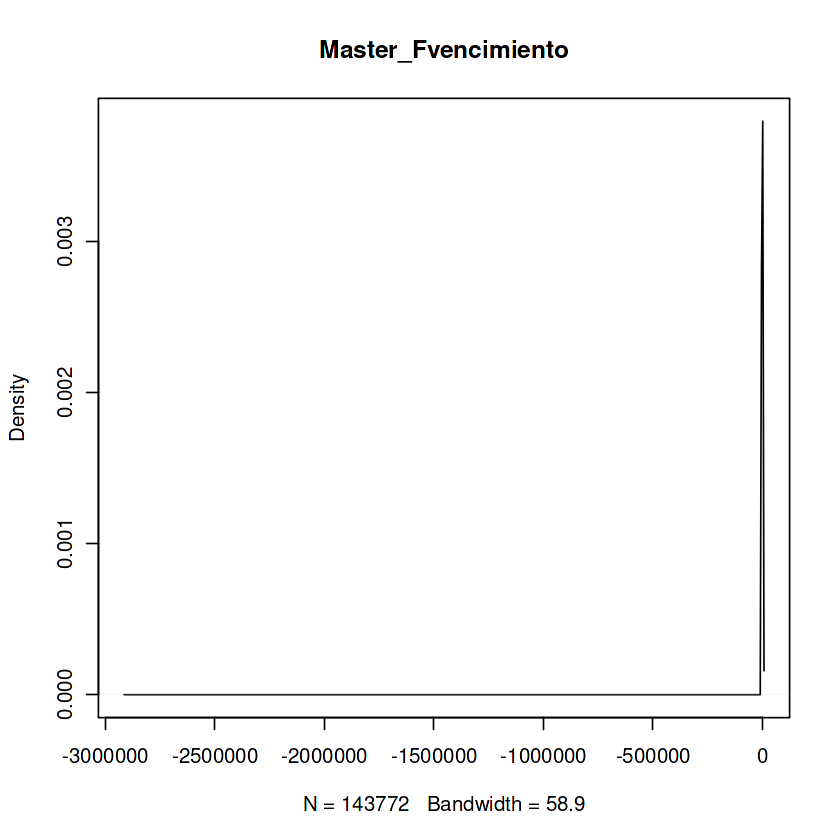

In [48]:
densidad_A  <- density( dataset[ foto_mes=="202012", get("Master_Fvencimiento" )],
                          kernel="gaussian", na.rm=TRUE )


  plot( densidad_A,
        
        main= "Master_Fvencimiento"
      )
